In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)



ModuleNotFoundError: No module named 'seaborn'

In [10]:
#Reading zomato data
df = pd.read_csv('data/zomato.csv')

In [11]:
#Display first 5 rows
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [12]:
#Display rows and columns of dataframe
df.shape

(45584, 20)

In [13]:
#Information about variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [14]:
#Checking the presence of duplicated records
df.duplicated().sum()

0

In [15]:
#Splitting into categorical and numerical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'There are {len(categorical_features)} categorical features.')
print(categorical_features)

There are 11 categorical features.
['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival', 'City']


In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(len(numerical_features))
numerical_features

9


['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)']

In [17]:
df[categorical_features].head()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,0xcdcd,DEHRES17DEL01,12-02-2022,21:55,22:10,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,0xd987,KOCRES16DEL01,13-02-2022,14:55,15:05,Stormy,High,Meal,motorcycle,No,Metropolitian
2,0x2784,PUNERES13DEL03,04-03-2022,17:30,17:40,Sandstorms,Medium,Drinks,scooter,No,Metropolitian
3,0xc8b6,LUDHRES15DEL02,13-02-2022,09:20,09:30,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
4,0xdb64,KNPRES14DEL02,14-02-2022,19:50,20:05,Fog,Jam,Snack,scooter,No,Metropolitian


In [18]:
df[numerical_features].head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2,3.0,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,1,1.0,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,1,1.0,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,0,0.0,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,1,1.0,41


In [19]:
for feature in categorical_features:
    print(f'The feature is {feature} and categories are  {df[feature].nunique()}')

The feature is ID and categories are  45584
The feature is Delivery_person_ID and categories are  1320
The feature is Order_Date and categories are  44
The feature is Time_Orderd and categories are  176
The feature is Time_Order_picked and categories are  193
The feature is Weather_conditions and categories are  6
The feature is Road_traffic_density and categories are  4
The feature is Type_of_order and categories are  4
The feature is Type_of_vehicle and categories are  4
The feature is Festival and categories are  2
The feature is City and categories are  3


In [20]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [21]:
df[categorical_features].describe()

,ID,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,45584,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,45584,1320,44,176,193,6,4,4,4,2,3
top,0xcdcd,JAPRES11DEL02,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,1192,461,495,7653,15476,11530,26429,44460,34087


In [22]:
#Missing values
for feature in categorical_features:
    print(f'The feature is {feature} --> {np.round(df[feature].isnull().mean()*100,4)}% Missing values')

The feature is ID --> 0.0% Missing values
The feature is Delivery_person_ID --> 0.0% Missing values
The feature is Order_Date --> 0.0% Missing values
The feature is Time_Orderd --> 3.7974% Missing values
The feature is Time_Order_picked --> 0.0% Missing values
The feature is Weather_conditions --> 1.3514% Missing values
The feature is Road_traffic_density --> 1.3184% Missing values
The feature is Type_of_order --> 0.0% Missing values
The feature is Type_of_vehicle --> 0.0% Missing values
The feature is Festival --> 0.5002% Missing values
The feature is City --> 2.6325% Missing values


In [23]:
for feature in numerical_features:
    print(f'The feature is {feature} --> {np.round(df[feature].isnull().mean()*100,4)}% Missing values')

The feature is Delivery_person_Age --> 4.0672% Missing values
The feature is Delivery_person_Ratings --> 4.1857% Missing values
The feature is Restaurant_latitude --> 0.0% Missing values
The feature is Restaurant_longitude --> 0.0% Missing values
The feature is Delivery_location_latitude --> 0.0% Missing values
The feature is Delivery_location_longitude --> 0.0% Missing values
The feature is Vehicle_condition --> 0.0% Missing values
The feature is multiple_deliveries --> 2.1784% Missing values
The feature is Time_taken (min) --> 0.0% Missing values


In [24]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [222]:
df['Delivery_person_Age'].isnull().sum()

1854

In [223]:
df['Delivery_person_Age'].unique()

array([36., 21., 23., 34., 24., 29., 35., 33., 25., 31., 37., 27., 32.,
       26., 38., 20., 22., nan, 28., 39., 30., 15., 50.])

In [224]:
df['Delivery_person_Ratings'].unique()

array([4.2, 4.7, 4.3, 4.5, 4. , 4.9, 4.1, 5. , 4.8, 3.5, 4.6, nan, 4.4,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [225]:
len(df['Restaurant_latitude'])

45584

In [226]:
len(df['Restaurant_longitude'])

45584

In [227]:
df['Delivery_location_latitude'].nunique()

4373

In [228]:
df['Delivery_location_longitude'].nunique()

4373

In [229]:
col_clean = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']

In [230]:
for feature in col_clean:
    df[feature] = abs(df[feature])

In [231]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [232]:
from haversine import haversine, Unit

# Coordinates of the source and destination

for i in range(len(df)):
    source= (df['Restaurant_latitude'][i],df['Restaurant_longitude'][i])
    destination=(df['Delivery_location_latitude'][i],df['Delivery_location_longitude'][i])
    # Calculate the distance using the Haversine formula
    
    distance = haversine(source, destination, unit=Unit.KILOMETERS)
    df.loc[i,'distance'] = distance
    


In [233]:
df['distance'].sort_values(ascending=False)

15701    20.969518
903      20.969518
25917    20.969518
16778    20.969074
16631    20.969074
           ...    
32166     1.465125
11373     1.465125
33057     1.465069
7401      1.465069
26576     1.465069
Name: distance, Length: 45584, dtype: float64

In [234]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645


In [235]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

/home/eliyas/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/eliyas/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/eliyas/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/eliyas/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20-03-2022' in DD/MM/YYYY 

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          43730 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

In [237]:
df['Time_Order_hour'] = df['Time_Orderd'].str.split(":").str[0]

In [238]:
df['Time_Order_min'] = df['Time_Orderd'].str.split(":").str[1]

In [239]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Time_Order_hour,Time_Order_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,21,55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,14,55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,17,30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,09,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645,19,50


In [240]:
df['Time_Order_picked_hour'] = df['Time_Order_picked'].str.split(":").str[0]
df['Time_Order_picked_min'] = df['Time_Order_picked'].str.split(":").str[1]


In [241]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Time_Order_hour,Time_Order_min,Time_Order_picked_hour,Time_Order_picked_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,21,55,22,10
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,14,55,15,05
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,17,30,17,40
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,09,20,09,30
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645,19,50,20,05
5,0x3af3,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,2022-02-04,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,13.763996,20,25,20,35
6,0x3aab,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,2022-01-03,14:55,15:10,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,33,6.218010,14,55,15,10
7,0x689b,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,2022-03-16,20:30,20:40,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,40,16.849963,20,30,20,40
8,0x6f67,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,2022-03-20,20:40,20:50,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41,10.757124,20,40,20,50
9,0xc9cf,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,2022-02-15,21:15,21:30,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,15,4.540581,21,15,21,30


In [242]:
for feature in ['Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries','Festival','City']:
    print(feature)
    print(df[feature].value_counts())
    print("*"*50)

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64
**************************************************
Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64
**************************************************
Vehicle_condition
2    15031
1    15028
0    15005
3      520
Name: Vehicle_condition, dtype: int64
**************************************************
Type_of_order
Snack     11530
Meal      11456
Drinks    11321
Buffet    11277
Name: Type_of_order, dtype: int64
**************************************************
Type_of_vehicle
motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64
**************************************************
multiple_deliveries
1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: m

In [243]:
data = df.copy()

In [244]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Time_Order_hour,Time_Order_min,Time_Order_picked_hour,Time_Order_picked_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,21,55,22,10
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,14,55,15,05
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,17,30,17,40
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,09,20,09,30
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645,19,50,20,05


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          43730 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

In [246]:
for feature in ['Time_Order_hour','Time_Order_min','Time_Order_picked_hour','Time_Order_picked_min']:
    data[feature] = data[feature].astype(float)

In [247]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Time_Order_hour,Time_Order_min,Time_Order_picked_hour,Time_Order_picked_min
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-12-02,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,21.0,55.0,22.0,10.0
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,14.0,55.0,15.0,5.0
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-04-03,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,17.0,30.0,17.0,40.0
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,9.0,20.0,9.0,30.0
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645,19.0,50.0,20.0,5.0


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          43730 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

In [249]:
data.drop(columns=['ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Time_Orderd','Time_Order_picked'],inplace = True)

In [250]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Time_Order_hour,Time_Order_min,Time_Order_picked_hour,Time_Order_picked_min
0,DEHRES17DEL01,36.0,4.2,2022-12-02,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280596,21.0,55.0,22.0,10.0
1,KOCRES16DEL01,21.0,4.7,2022-02-13,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242327,14.0,55.0,15.0,5.0
2,PUNERES13DEL03,23.0,4.7,2022-04-03,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787879,17.0,30.0,17.0,40.0
3,LUDHRES15DEL02,34.0,4.3,2022-02-13,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930262,9.0,20.0,9.0,30.0
4,KNPRES14DEL02,24.0,4.7,2022-02-14,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396645,19.0,50.0,20.0,5.0


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Delivery_person_ID       45584 non-null  object        
 1   Delivery_person_Age      43730 non-null  float64       
 2   Delivery_person_Ratings  43676 non-null  float64       
 3   Order_Date               45584 non-null  datetime64[ns]
 4   Weather_conditions       44968 non-null  object        
 5   Road_traffic_density     44983 non-null  object        
 6   Vehicle_condition        45584 non-null  int64         
 7   Type_of_order            45584 non-null  object        
 8   Type_of_vehicle          45584 non-null  object        
 9   multiple_deliveries      44591 non-null  float64       
 10  Festival                 45356 non-null  object        
 11  City                     44384 non-null  object        
 12  Time_taken (min)         45584 n

In [252]:
numerical_features = [feature for feature in data.columns if data[feature].dtype !='O']

In [253]:
numerical_features

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Order_Date',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'distance',
 'Time_Order_hour',
 'Time_Order_min',
 'Time_Order_picked_hour',
 'Time_Order_picked_min']

In [254]:
categorical_features = [feature for feature in data.columns if data[feature].dtype =='O']

In [255]:
categorical_features

['Delivery_person_ID',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

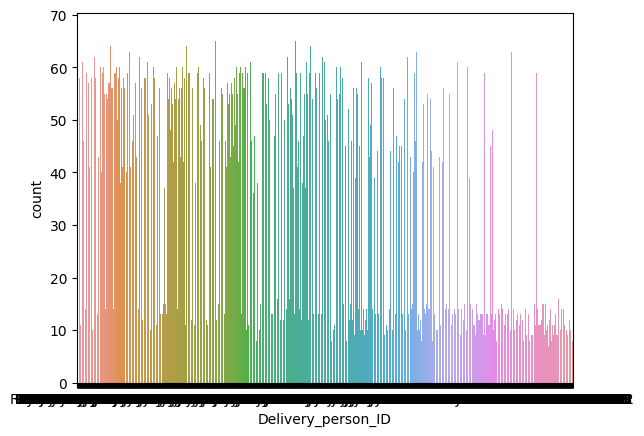

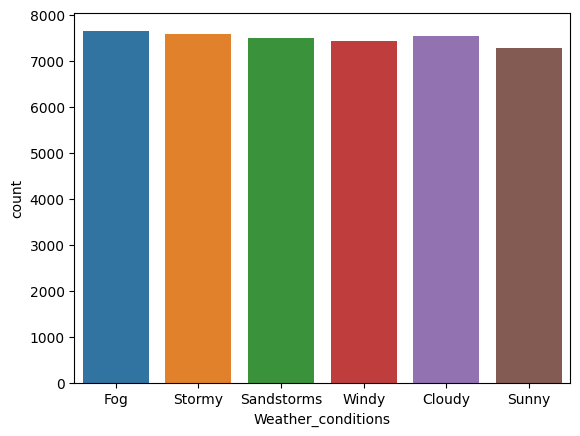

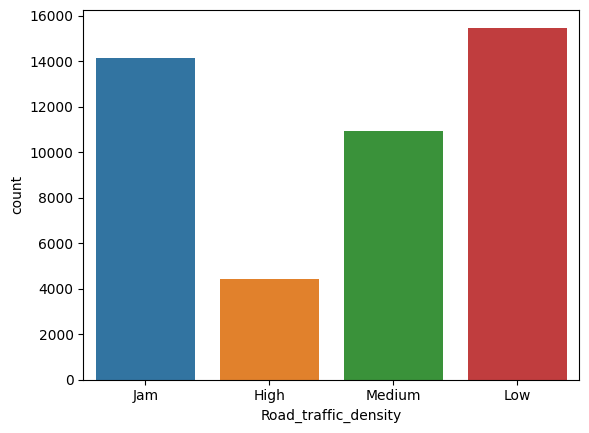

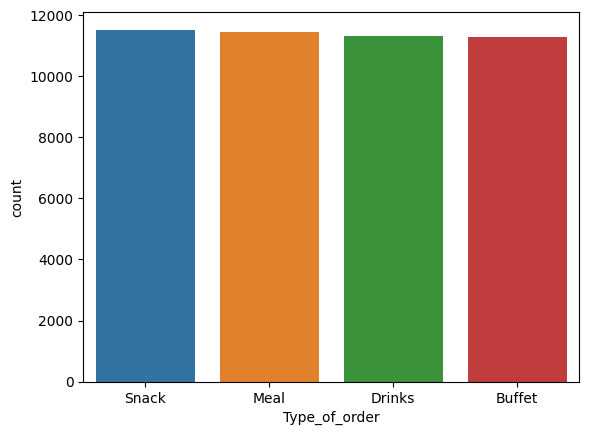

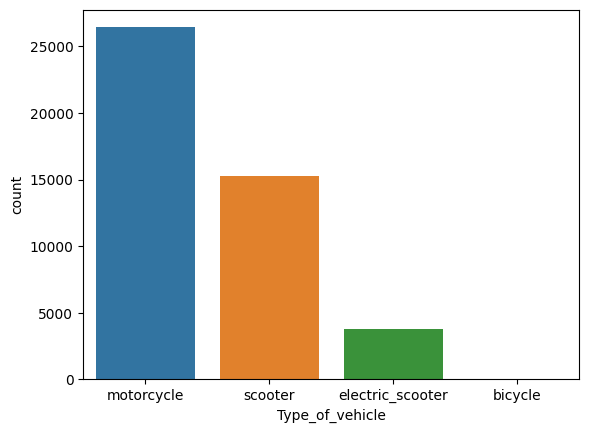

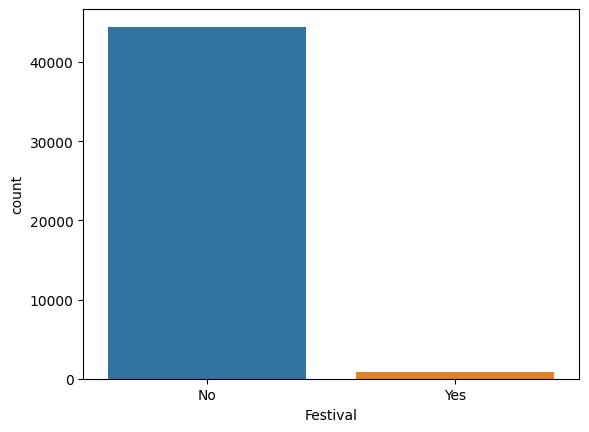

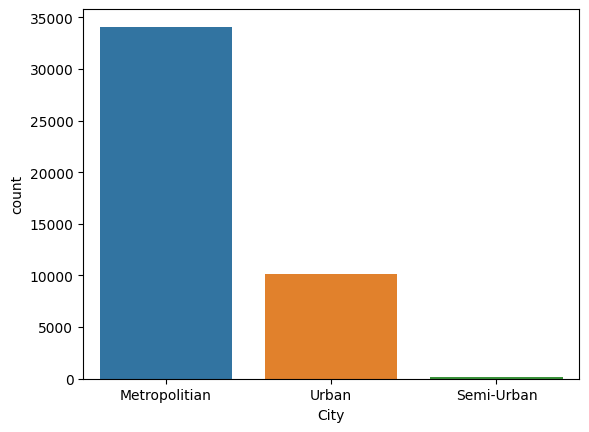

In [256]:
for feature in categorical_features:
    sns.countplot(data = data,x = data[feature])
    plt.show()

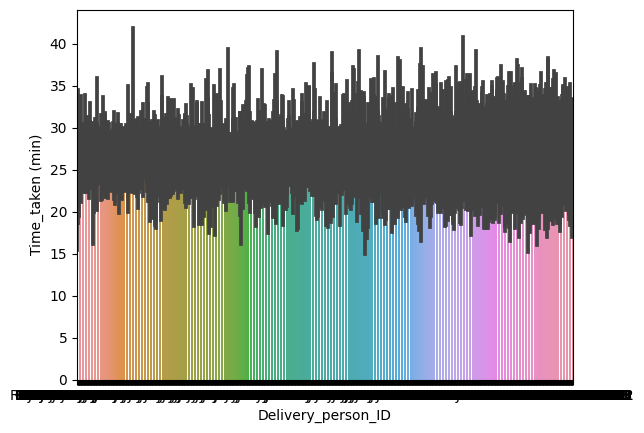

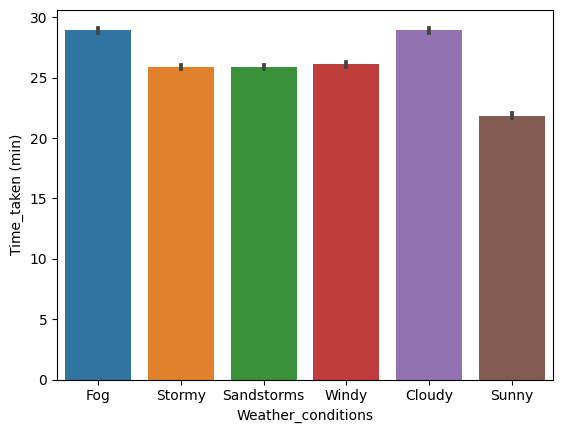

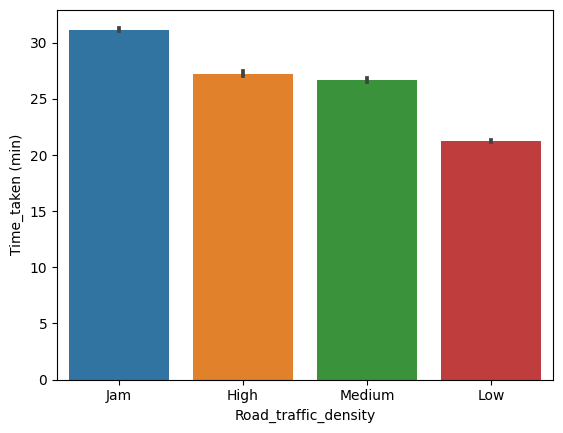

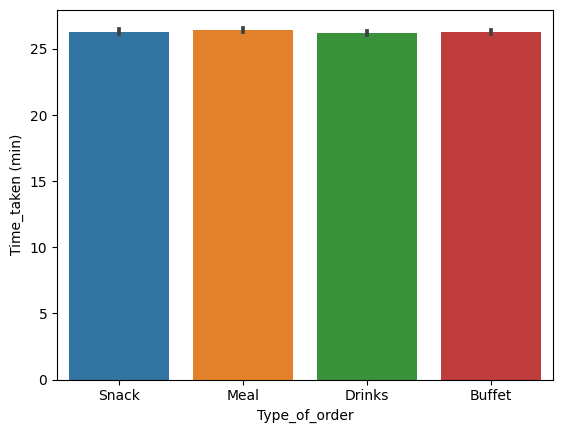

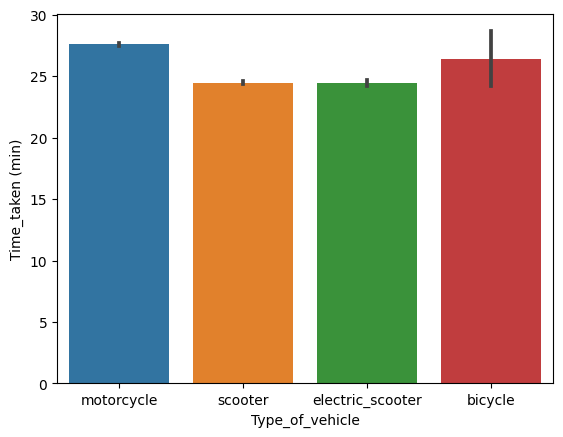

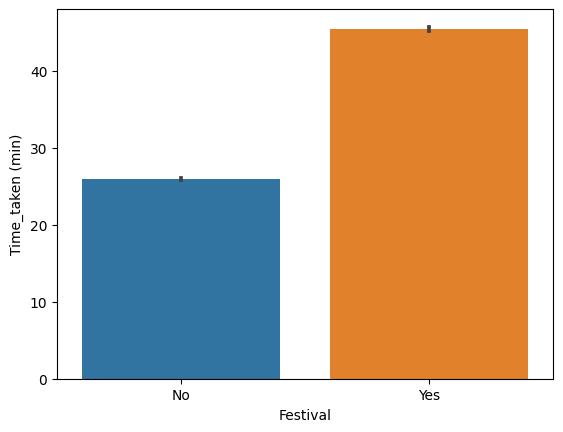

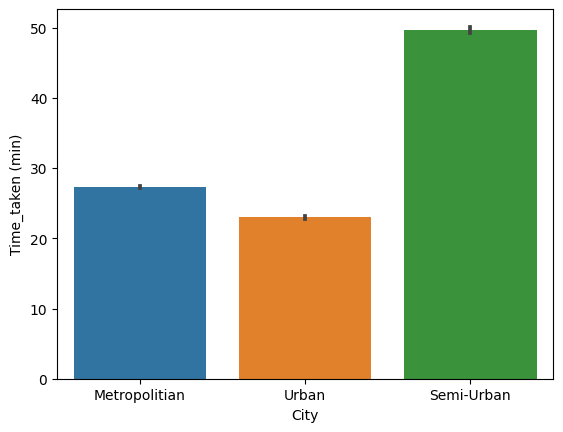

In [257]:
for feature in categorical_features:
    sns.barplot(data = data,x = data[feature],y=data['Time_taken (min)'])
    plt.show()

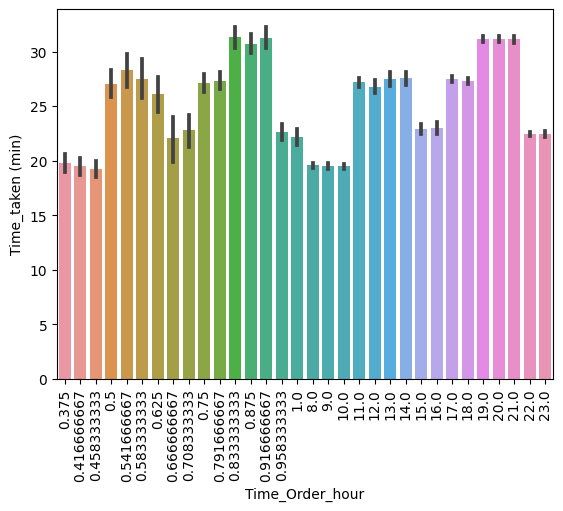

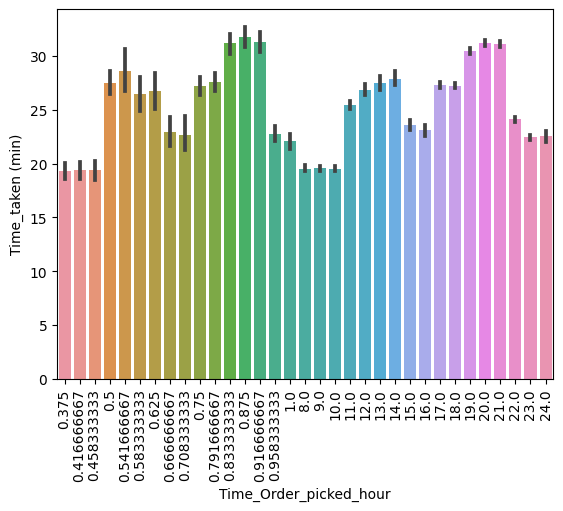

In [261]:
for feature in ['Time_Order_hour','Time_Order_picked_hour']:
    ax = sns.barplot(data = data,x = data[feature],y=data['Time_taken (min)'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

In [262]:
data[data['Time_Order_picked_hour']<1]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Time_Order_hour,Time_Order_min,Time_Order_picked_hour,Time_Order_picked_min
36,KOLRES16DEL02,37.0,4.9,2022-02-13,Fog,Low,1,Snack,scooter,1.0,No,Urban,16,3.027241,10.0,55.0,0.458333,NaN
46,COIMBRES07DEL03,24.0,4.7,2022-10-03,Sunny,Medium,0,Buffet,motorcycle,0.0,No,Urban,19,14.023251,17.0,55.0,0.750000,NaN
47,AGRRES12DEL03,39.0,4.6,2022-02-14,Sunny,Low,1,Snack,motorcycle,1.0,No,Metropolitian,27,13.392631,22.0,45.0,0.958333,NaN
52,MYSRES04DEL03,33.0,4.9,2022-03-30,Sunny,Jam,2,Drinks,scooter,0.0,No,Metropolitian,22,4.663573,21.0,55.0,0.916667,NaN
57,DEHRES19DEL02,39.0,4.9,2022-02-15,Stormy,Jam,2,Meal,motorcycle,1.0,No,Metropolitian,30,7.342186,20.0,55.0,0.875000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,HYDRES06DEL01,NaN,NaN,2022-03-23,Fog,Medium,0,Meal,motorcycle,1.0,No,Urban,36,10.756288,17.0,55.0,0.750000,NaN
45530,JAPRES04DEL02,24.0,5.0,2022-03-19,Stormy,Jam,1,Meal,scooter,1.0,No,Metropolitian,28,7.448655,20.0,50.0,0.875000,NaN
45538,GOARES20DEL02,37.0,4.3,2022-02-15,Windy,Low,0,Snack,motorcycle,0.0,No,Metropolitian,32,3.145072,10.0,45.0,0.458333,NaN
45566,HYDRES03DEL03,34.0,4.9,2022-03-24,Stormy,Jam,1,Meal,motorcycle,1.0,No,Metropolitian,28,9.220595,21.0,45.0,0.916667,NaN


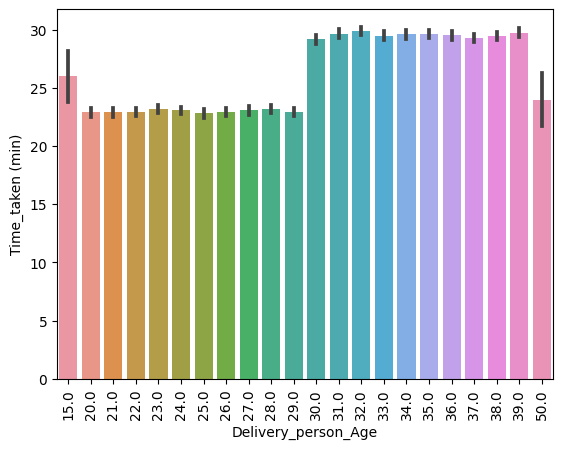

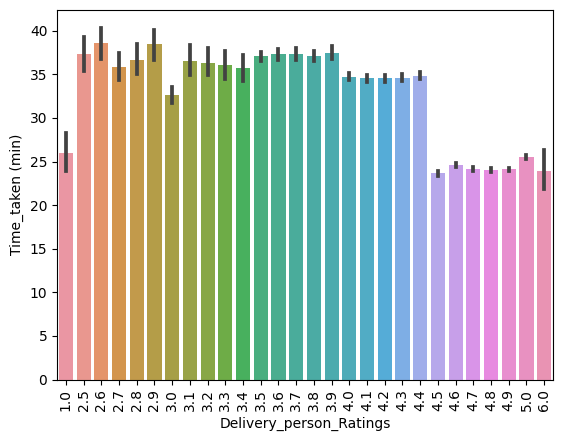

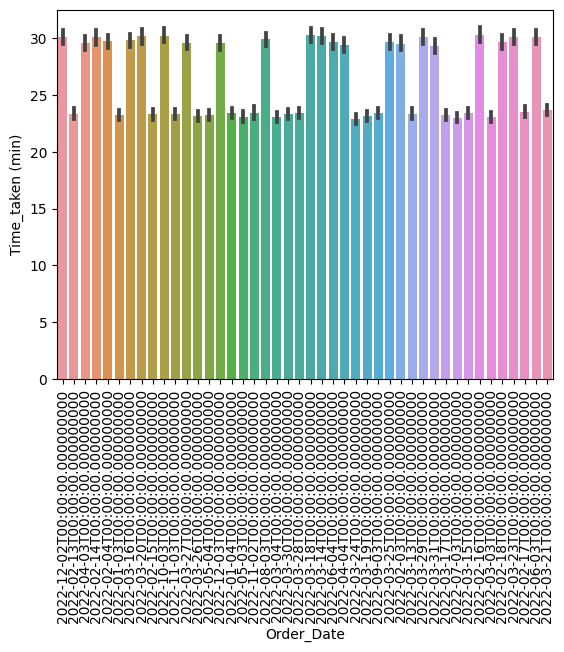

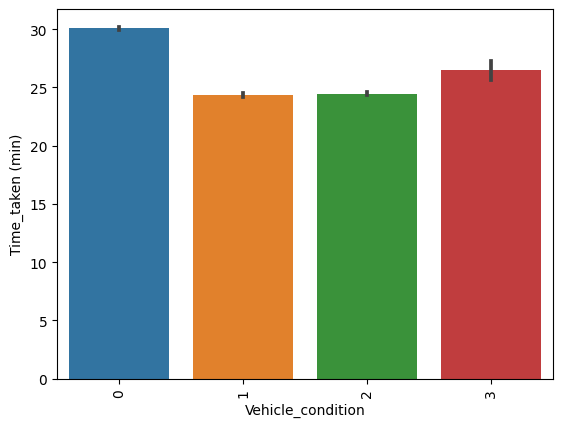

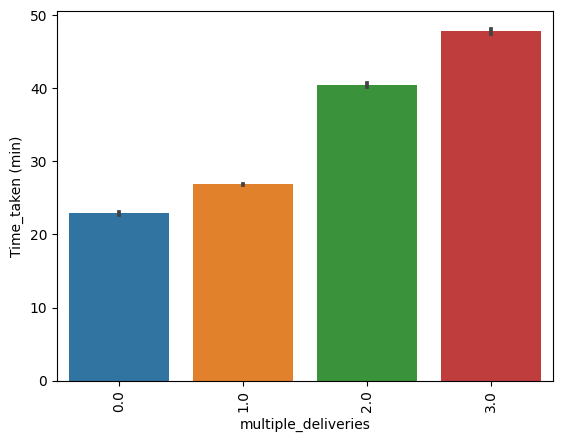

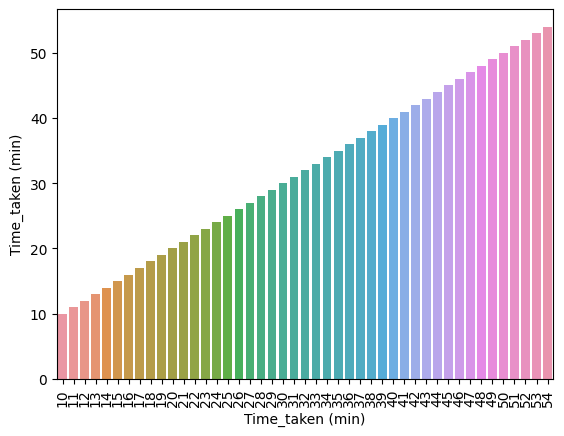

KeyboardInterrupt: 

In [258]:
for feature in numerical_features:
    ax = sns.barplot(data = data,x = data[feature],y=data['Time_taken (min)'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

In [ ]:
for feature in numerical_features:
    sns.histplot(data = data,x = data[feature],kde = True)
    plt.show()

In [ ]:
data.head()

In [ ]:
##correlation
sns.heatmap(df[numerical_features].corr(),annot=True)

## Feature Engineering

In [ ]:
data['Weather_conditions'].value_counts()

In [ ]:
weather_map = {
    'Sunny':1,'Windy':2,'Stormy':2,'Sandstorms':2,'Fog':3,'Cloudy':3
}

In [ ]:
data['Road_traffic_density'].value_counts()

In [ ]:
traffic_map = {
    'Low':1,'Medium':2,'High':3,'Jam':4
}

In [ ]:
data['Type_of_vehicle'].value_counts()

In [ ]:
Type_of_vehicle_map = {
    'scooter':1,'electric_scooter':1,'motorcycle':2,'bicycle':2
}

In [ ]:
Festival_map = {
    'No':0,'Yes':1
}

In [ ]:
data['City'].value_counts()

In [ ]:
city_map = {
    'Urban':1,'Metropolitian':2,'Semi-Urban':3
}

In [ ]:
data['Weather_conditions'] = data['Weather_conditions'].map(weather_map)

In [ ]:
data['Road_traffic_density'] = data['Road_traffic_density'].map(traffic_map)

In [ ]:
data['Type_of_vehicle'] = data['Type_of_vehicle'].map(Type_of_vehicle_map)

In [ ]:
data['Festival'] = data['Festival'].map(Festival_map)

In [ ]:
data['City'] = data['City'].map(city_map)

In [ ]:
data.head()